In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score


sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)


file_path = 'data/–ë–∞–∑–∞.csv'
try:
    df_raw = pd.read_csv(file_path, sep=';')
    print(f"–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã. –§–æ—Ä–º–∞: {df_raw.shape}")
except FileNotFoundError:
    print(f"!!! –ö–†–ò–¢–ò–ß–ï–°–ö–ê–Ø –û–®–ò–ë–ö–ê: –§–∞–π–ª –Ω–µ –Ω–∞–π–¥–µ–Ω –ø–æ –ø—É—Ç–∏ '{file_path}'.")

–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã. –§–æ—Ä–º–∞: (5519, 21)


In [ ]:

df_filtered = df_raw[df_raw['–í–∏–¥–ü–æ–º–µ—â–µ–Ω–∏—è'].str.strip() == '–∂–∏–ª—ã–µ –ø–æ–º–µ—â–µ–Ω–∏—è'].copy()
final_statuses = ['–ü—Ä–æ–¥–∞–Ω–∞', '–°–≤–æ–±–æ–¥–Ω–∞']
df_final = df_filtered[df_filtered['–°–ª–µ–¥—É—é—â–∏–π–°—Ç–∞—Ç—É—Å'].isin(final_statuses)].copy()

df_final['target'] = df_final['–°–ª–µ–¥—É—é—â–∏–π–°—Ç–∞—Ç—É—Å'].map({'–ü—Ä–æ–¥–∞–Ω–∞': 1, '–°–≤–æ–±–æ–¥–Ω–∞': 0})
df_final.drop(['–£–ò–î_–ë—Ä–æ–Ω–∏', '–í–∏–¥–ü–æ–º–µ—â–µ–Ω–∏—è', '–°–ª–µ–¥—É—é—â–∏–π–°—Ç–∞—Ç—É—Å'], axis=1, inplace=True)
print(f"–î–∞–Ω–Ω—ã–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω—ã. –†–∞–∑–º–µ—Ä –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df_final.shape}")

–î–∞–Ω–Ω—ã–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω—ã. –†–∞–∑–º–µ—Ä –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏: (3944, 19)


In [ ]:


df_processed = df_final.copy()
print(f"\n--- –ù–∞—á–∞–ª–æ –æ—á–∏—Å—Ç–∫–∏. –†–∞–∑–º–µ—Ä: {df_processed.shape} ---")

numeric_cols = [
    '–ü—Ä–æ–¥–∞–≤–∞–µ–º–∞—è–ü–ª–æ—â–∞–¥—å', '–≠—Ç–∞–∂', '–°—Ç–æ–∏–º–æ—Å—Ç—å–ù–∞–î–∞—Ç—É–ë—Ä–æ–Ω–∏', 
    '–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É', '–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è', '–¢–∏–ø'
]
for col in numeric_cols:
    if df_processed[col].dtype == 'object':
        if col == '–¢–∏–ø':
            df_processed[col] = df_processed[col].str.replace('–∫', '', regex=False)
        df_processed[col] = df_processed[col].str.replace(',', '.', regex=False)
    
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
print("–ß–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã.")


binary_cols_map = {
    '–í—Ä–µ–º–µ–Ω–Ω–∞—è–ë—Ä–æ–Ω—å': {'–¥–∞': 1, '–Ω–µ—Ç': 0},
    '–°–¥–µ–ª–∫–∞–ê–ù': {'–¥–∞': 1, '–Ω–µ—Ç': 0},
    '–ò–Ω–≤–µ—Å—Ç–∏—Ü–∏–æ–Ω–Ω—ã–π–ü—Ä–æ–¥—É–∫—Ç': {'–¥–∞': 1, '–Ω–µ—Ç': 0},
    '–ü—Ä–∏–≤–∏–ª–µ–≥–∏—è': {'–¥–∞': 1, '–Ω–µ—Ç': 0}
}
for col, mapping in binary_cols_map.items():
    df_processed[col] = df_processed[col].str.lower().map(mapping)

df_processed['–ò—Å—Ç–æ—á–Ω–∏–∫–ë—Ä–æ–Ω–∏'] = df_processed['–ò—Å—Ç–æ—á–Ω–∏–∫–ë—Ä–æ–Ω–∏'].map({'—Ä—É—á–Ω–∞—è': 0, '–ú–ü': 1})

df_processed['–¢–∏–ø–°—Ç–æ–∏–º–æ—Å—Ç–∏'] = df_processed['–¢–∏–ø–°—Ç–æ–∏–º–æ—Å—Ç–∏'].str.contains('100%', na=False).astype(int)
df_processed['–í–∞—Ä–∏–∞–Ω—Ç–û–ø–ª–∞—Ç—ã'] = df_processed['–í–∞—Ä–∏–∞–Ω—Ç–û–ø–ª–∞—Ç—ã'].str.contains('–ï–¥–∏–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è', na=False).astype(int)
print("–ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã.")


df_processed = pd.get_dummies(df_processed, columns=['–ì–æ—Ä–æ–¥', '–°—Ç–∞—Ç—É—Å –ª–∏–¥–∞ (–∏–∑ CRM)'], drop_first=True, dtype=int)
print("–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã.")


df_processed.drop(['–î–∞—Ç–∞–ë—Ä–æ–Ω–∏', '–í—Ä–µ–º—è–ë—Ä–æ–Ω–∏', '–í–∞—Ä–∏–∞–Ω—Ç–û–ø–ª–∞—Ç—ã–î–æ–ø'], axis=1, inplace=True, errors='ignore')

print("\n--- –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ ---")
for col in df_processed.columns:
    if df_processed[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_processed[col]):
            median_val = df_processed[col].median()
            df_processed[col] = df_processed[col].fillna(median_val)
            print(f"–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü '{col}': –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–æ–π ({median_val:.2f})")
        else: # –≠—Ç–æ—Ç –±–ª–æ–∫ —Ç–µ–ø–µ—Ä—å, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω–µ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è, –Ω–æ –æ—Å—Ç–∞–≤–∏–º –¥–ª—è –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç–∏
            mode_val = df_processed[col].mode()[0]
            df_processed[col] = df_processed[col].fillna(median_val)
            print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü '{col}': –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –º–æ–¥–æ–π ('{mode_val}')")

if df_processed.isnull().sum().sum() == 0:
    print(f"\n–û—á–∏—Å—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ. –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä: {df_processed.shape}")
else:
    raise RuntimeError("–û–®–ò–ë–ö–ê: –ü–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏ –≤—Å–µ –µ—â–µ –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏!")


--- –ù–∞—á–∞–ª–æ –æ—á–∏—Å—Ç–∫–∏. –†–∞–∑–º–µ—Ä: (3944, 19) ---
–ß–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã.
–ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã.
–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã.

--- –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ ---
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü '–¢–∏–ø': –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–æ–π (2.00)
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü '–ü—Ä–æ–¥–∞–≤–∞–µ–º–∞—è–ü–ª–æ—â–∞–¥—å': –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–æ–π (60.50)
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü '–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É': –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–æ–π (111876.00)

–û—á–∏—Å—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ. –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä: (3944, 24)


In [ ]:

epsilon = 1e-6
df_processed['–¶–µ–Ω–∞–ó–∞–ú–µ—Ç—Ä'] = df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'] / (df_processed['–ü—Ä–æ–¥–∞–≤–∞–µ–º–∞—è–ü–ª–æ—â–∞–¥—å'] + epsilon)
initial_price = df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'] + df_processed['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É']
df_processed['–°–∫–∏–¥–∫–∞–ü—Ä–æ—Ü–µ–Ω—Ç'] = (df_processed['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É'] / (initial_price + epsilon)) * 100
print("–°–æ–∑–¥–∞–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.")

y = df_processed['target']
X = df_processed.drop('target', axis=1)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É'] = (X_scaled['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É'] - 0.5)
print(f"–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤: \n{y.value_counts(normalize=True)}")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(f"–î–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã. Train: {X_train.shape}, Test: {X_test.shape}")


def evaluate_model(model, model_name):
    print(f"\n--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: {model_name} ---")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    print(f"  Precision: {precision:.4f} | Recall: {recall:.4f} | F1-–º–µ—Ä–∞: {f1:.4f}")
    return {'model': model_name, 'precision': precision, 'recall': recall, 'f1_score': f1}

knn = KNeighborsClassifier()
knn_results = evaluate_model(knn, "K-Nearest Neighbors (KNN)")

tree = DecisionTreeClassifier(random_state=42)
tree_results = evaluate_model(tree, "Decision Tree")

print("\n--- –ò—Ç–æ–≥–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π ---")
results_df = pd.DataFrame([knn_results, tree_results]).sort_values('f1_score', ascending=False)
display(results_df)

–°–æ–∑–¥–∞–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤: 
target
0    0.710953
1    0.289047
Name: proportion, dtype: float64
–î–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã. Train: (2760, 25), Test: (1184, 25)

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: K-Nearest Neighbors (KNN) ---
  Precision: 0.7491 | Recall: 0.6199 | F1-–º–µ—Ä–∞: 0.6784

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: Decision Tree ---
  Precision: 0.8018 | Recall: 0.7690 | F1-–º–µ—Ä–∞: 0.7851

--- –ò—Ç–æ–≥–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π ---


model  precision    recall  f1_score
1              Decision Tree   0.801829  0.769006  0.785075
0  K-Nearest Neighbors (KNN)   0.749117  0.619883  0.678400

--- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –¥–æ —É–¥–∞–ª–µ–Ω–∏—è ---


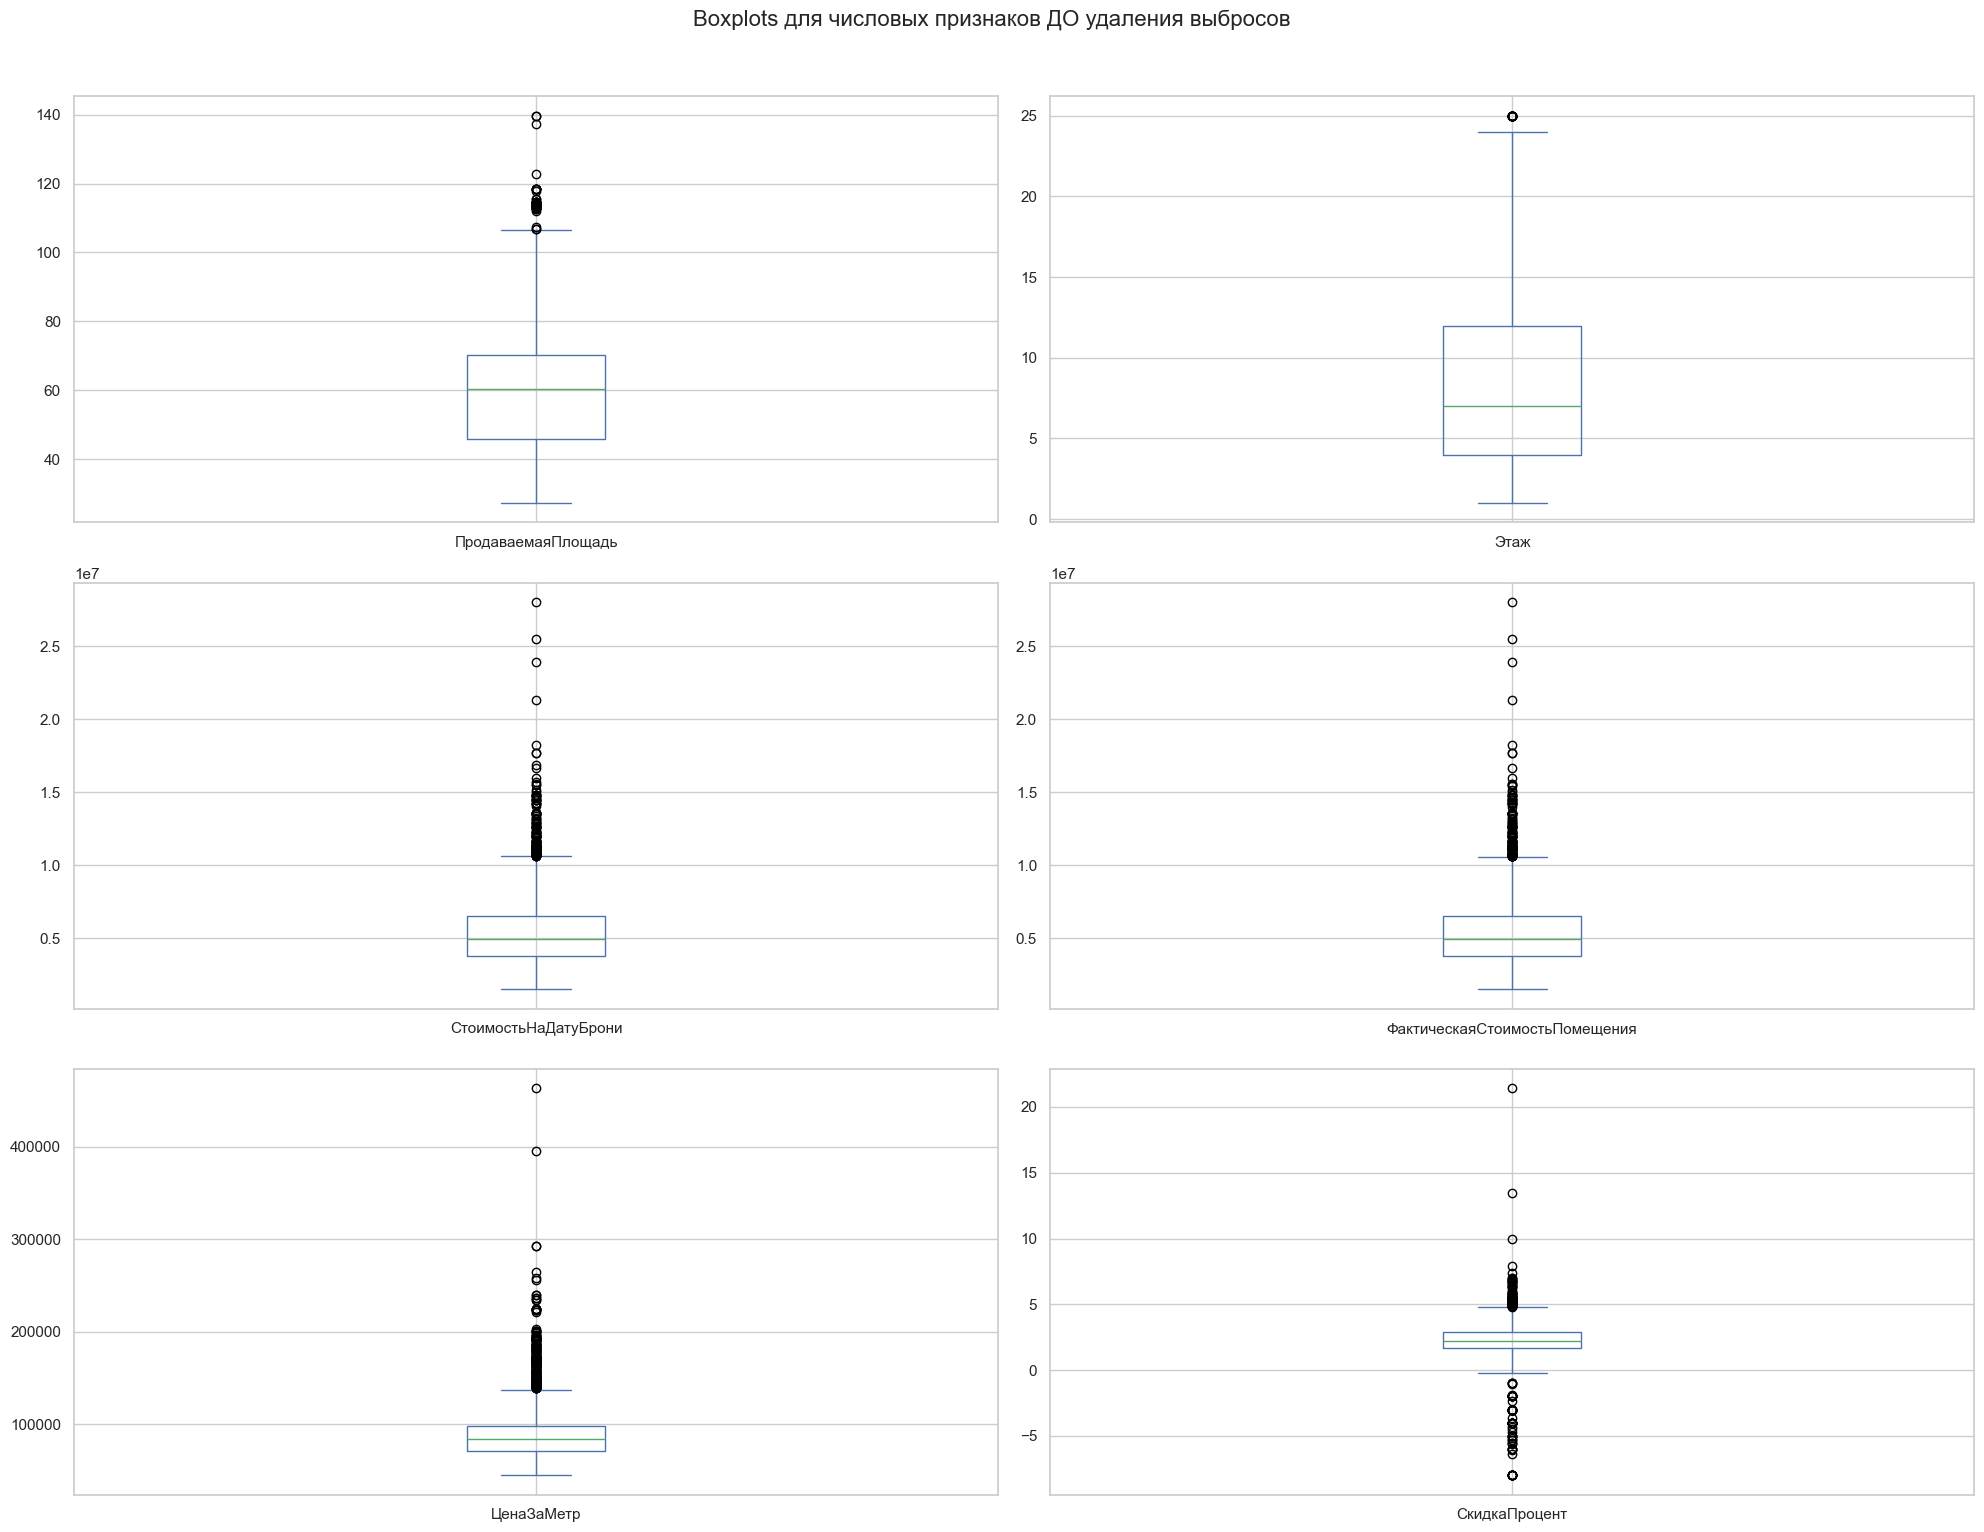


--- –ü—Ä–æ—Ü–µ—Å—Å —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ ---
–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: 3944 —Å—Ç—Ä–æ–∫.
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ '–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è': 3802 —Å—Ç—Ä–æ–∫.
–£–¥–∞–ª–µ–Ω–æ: 142 —Å—Ç—Ä–æ–∫.

--- –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –ë–ï–ó –≤—ã–±—Ä–æ—Å–æ–≤ ---

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: KNN (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤) ---
  Precision: 0.7491 | Recall: 0.6199 | F1-–º–µ—Ä–∞: 0.6784

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: Decision Tree (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤) ---
  Precision: 0.8018 | Recall: 0.7690 | F1-–º–µ—Ä–∞: 0.7851

--- –í—ã–≤–æ–¥ –ø–æ —É–¥–∞–ª–µ–Ω–∏—é –≤—ã–±—Ä–æ—Å–æ–≤ ---
–°—Ä–∞–≤–Ω–∏—Ç–µ F1-–º–µ—Ä—É –º–æ–¥–µ–ª–µ–π –¥–æ –∏ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤.
–ß–∞—Å—Ç–æ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ–º–Ω–æ–≥–æ —Å–Ω–∏–∂–∞–µ—Ç F1-–º–µ—Ä—É, –Ω–æ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ –º–µ–Ω–µ–µ —Å–∫–ª–æ–Ω–Ω–æ–π –∫ –ø–µ—Ä–µ–æ

In [ ]:

print("--- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –¥–æ —É–¥–∞–ª–µ–Ω–∏—è ---")
numeric_features_for_boxplot = ['–ü—Ä–æ–¥–∞–≤–∞–µ–º–∞—è–ü–ª–æ—â–∞–¥—å', '–≠—Ç–∞–∂', '–°—Ç–æ–∏–º–æ—Å—Ç—å–ù–∞–î–∞—Ç—É–ë—Ä–æ–Ω–∏', '–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è', '–¶–µ–Ω–∞–ó–∞–ú–µ—Ç—Ä', '–°–∫–∏–¥–∫–∞–ü—Ä–æ—Ü–µ–Ω—Ç']
X[numeric_features_for_boxplot].plot(kind='box', subplots=True, layout=(3, 2), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle("Boxplots –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –î–û —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


print("\n--- –ü—Ä–æ—Ü–µ—Å—Å —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ ---")
Q1 = df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'].quantile(0.25)
Q3 = df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df_processed[(df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'] >= lower_bound) & (df_processed['–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è'] <= upper_bound)]

print(f"–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df_processed.shape[0]} —Å—Ç—Ä–æ–∫.")
print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ '–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è–°—Ç–æ–∏–º–æ—Å—Ç—å–ü–æ–º–µ—â–µ–Ω–∏—è': {df_no_outliers.shape[0]} —Å—Ç—Ä–æ–∫.")
print(f"–£–¥–∞–ª–µ–Ω–æ: {df_processed.shape[0] - df_no_outliers.shape[0]} —Å—Ç—Ä–æ–∫.")


y_no_outliers = df_no_outliers['target']
X_no_outliers = df_no_outliers.drop('target', axis=1)

scaler_no_outliers = MinMaxScaler()
X_scaled_no_outliers = pd.DataFrame(scaler_no_outliers.fit_transform(X_no_outliers), columns=X_no_outliers.columns)
X_scaled_no_outliers['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É'] = (X_scaled_no_outliers['–°–∫–∏–¥–∫–∞–ù–∞–ö–≤–∞—Ä—Ç–∏—Ä—É'] - 0.5)

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_scaled_no_outliers, y_no_outliers, test_size=0.3, random_state=42, stratify=y_no_outliers
)

print("\n--- –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –ë–ï–ó –≤—ã–±—Ä–æ—Å–æ–≤ ---")
knn_no_outliers_results = evaluate_model(KNeighborsClassifier(), "KNN (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)")
tree_no_outliers_results = evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)")

# 4. –í—ã–≤–æ–¥
print("\n--- –í—ã–≤–æ–¥ –ø–æ —É–¥–∞–ª–µ–Ω–∏—é –≤—ã–±—Ä–æ—Å–æ–≤ ---")
print("–°—Ä–∞–≤–Ω–∏—Ç–µ F1-–º–µ—Ä—É –º–æ–¥–µ–ª–µ–π –¥–æ –∏ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤.")
print("–ß–∞—Å—Ç–æ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ–º–Ω–æ–≥–æ —Å–Ω–∏–∂–∞–µ—Ç F1-–º–µ—Ä—É, –Ω–æ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ –º–µ–Ω–µ–µ —Å–∫–ª–æ–Ω–Ω–æ–π –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –Ω–∞ –∞–Ω–æ–º–∞–ª–∏—è—Ö.")

--- –ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ k –¥–ª—è KNN ---


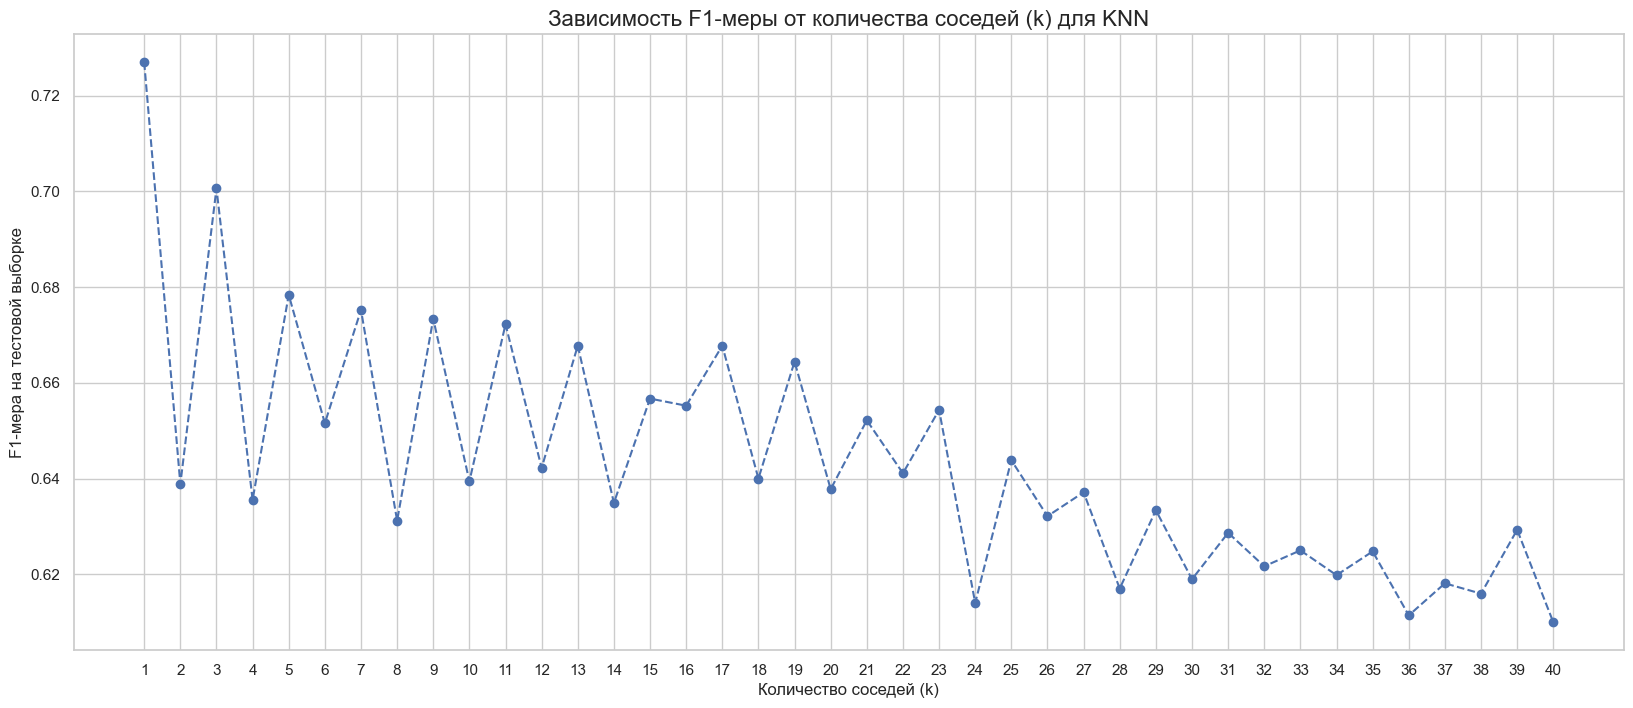

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ k –¥–ª—è KNN: 1 (F1-–º–µ—Ä–∞: 0.7270)

--- –ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –≥–ª—É–±–∏–Ω—ã –¥–ª—è Decision Tree ---


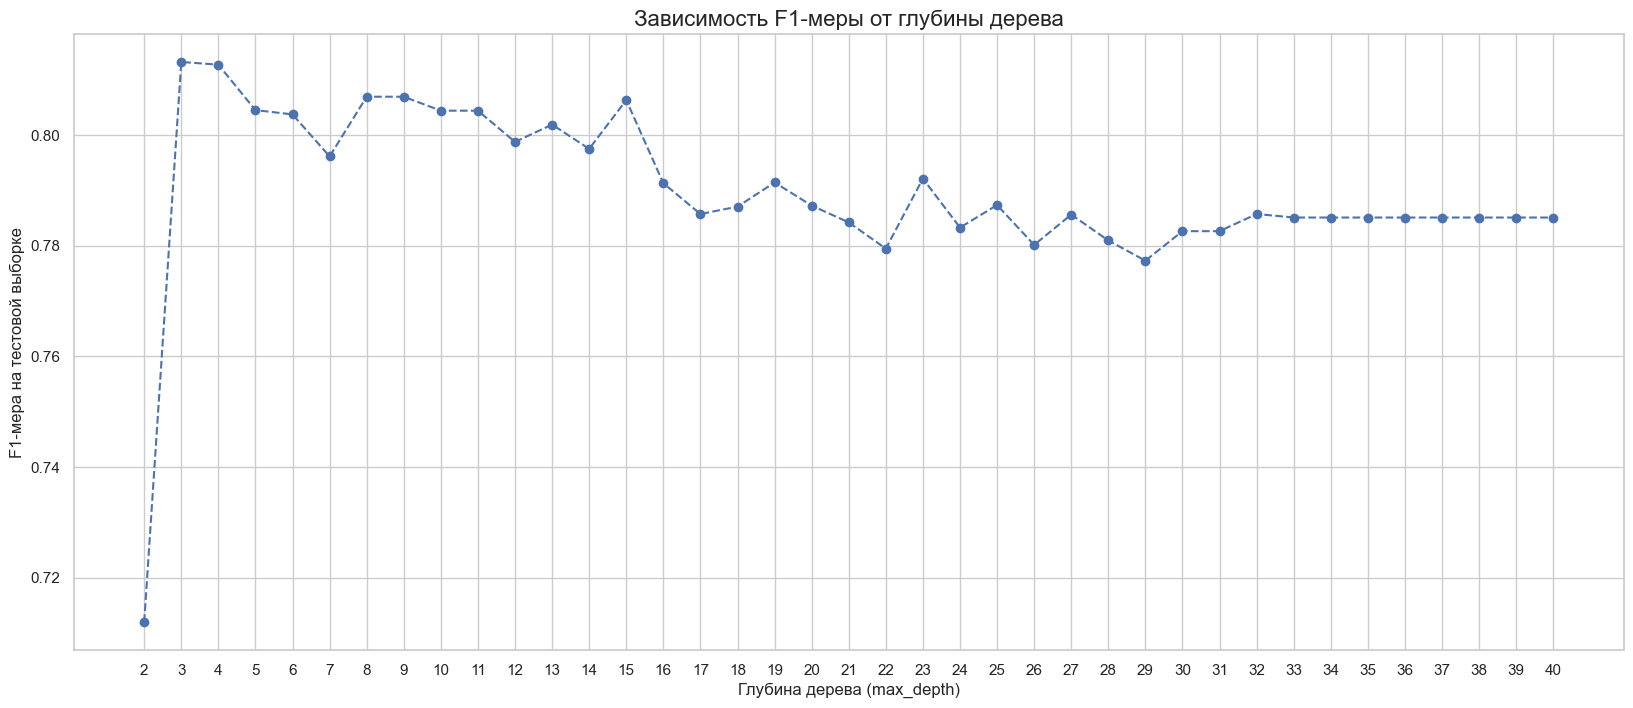

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ max_depth –¥–ª—è Decision Tree: 3 (F1-–º–µ—Ä–∞: 0.8132)


In [ ]:

print("--- –ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ k –¥–ª—è KNN ---")
k_range = range(1, 41)
f1_scores_knn = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores_knn.append(f1_score(y_test, y_pred))


plt.figure(figsize=(20, 8))
plt.plot(k_range, f1_scores_knn, marker='o', linestyle='--')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å F1-–º–µ—Ä—ã –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–æ—Å–µ–¥–µ–π (k) –¥–ª—è KNN', fontsize=16)
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π (k)', fontsize=12)
plt.ylabel('F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()


optimal_k = k_range[np.argmax(f1_scores_knn)]
print(f"–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ k –¥–ª—è KNN: {optimal_k} (F1-–º–µ—Ä–∞: {max(f1_scores_knn):.4f})")


print("\n--- –ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –≥–ª—É–±–∏–Ω—ã –¥–ª—è Decision Tree ---")
depth_range = range(2, 41)
f1_scores_tree = []

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    f1_scores_tree.append(f1_score(y_test, y_pred))


plt.figure(figsize=(20, 8))
plt.plot(depth_range, f1_scores_tree, marker='o', linestyle='--')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å F1-–º–µ—Ä—ã –æ—Ç –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤–∞', fontsize=16)
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞ (max_depth)', fontsize=12)
plt.ylabel('F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ', fontsize=12)
plt.xticks(depth_range)
plt.grid(True)
plt.show()


optimal_depth = depth_range[np.argmax(f1_scores_tree)]
print(f"–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ max_depth –¥–ª—è Decision Tree: {optimal_depth} (F1-–º–µ—Ä–∞: {max(f1_scores_tree):.4f})")

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg_results = evaluate_model(log_reg, "Logistic Regression")


svm = LinearSVC(max_iter=5000, random_state=42, dual=False)
svm_results = evaluate_model(svm, "SVM (LinearSVC)")


--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: Logistic Regression ---
  Precision: 0.8670 | Recall: 0.5526 | F1-–º–µ—Ä–∞: 0.6750

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: SVM (LinearSVC) ---
  Precision: 0.8750 | Recall: 0.5731 | F1-–º–µ—Ä–∞: 0.6926


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg_results = evaluate_model(log_reg, "Logistic Regression")


svm = LinearSVC(max_iter=5000, random_state=42, dual=False)
svm_results = evaluate_model(svm, "SVM (LinearSVC)")


--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: Logistic Regression ---
  Precision: 0.8670 | Recall: 0.5526 | F1-–º–µ—Ä–∞: 0.6750

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: SVM (LinearSVC) ---
  Precision: 0.8750 | Recall: 0.5731 | F1-–º–µ—Ä–∞: 0.6926


In [ ]:

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal_results = evaluate_model(knn_optimal, "KNN (Optimal k)")

tree_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree_optimal_results = evaluate_model(tree_optimal, "Decision Tree (Optimal depth)")



all_results = pd.DataFrame([
    knn_results,
    tree_results,
    knn_no_outliers_results,
    tree_no_outliers_results,
    knn_optimal_results,
    tree_optimal_results,
    log_reg_results,
    svm_results
])


all_results_sorted = all_results.sort_values('f1_score', ascending=False).reset_index(drop=True)

print("\n\n--- üèÜ –§–ò–ù–ê–õ–¨–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô üèÜ ---")
display(all_results_sorted)

print(f"\nüèÜ –ê–±—Å–æ–ª—é—Ç–Ω–æ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ F1-–º–µ—Ä–µ: '{all_results_sorted.iloc[0]['model']}' —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º {all_results_sorted.iloc[0]['f1_score']:.4f}")


--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: KNN (Optimal k) ---
  Precision: 0.7508 | Recall: 0.7047 | F1-–º–µ—Ä–∞: 0.7270

--- –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: Decision Tree (Optimal depth) ---
  Precision: 0.8780 | Recall: 0.7573 | F1-–º–µ—Ä–∞: 0.8132


--- üèÜ –§–ò–ù–ê–õ–¨–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –°–†–ê–í–ù–ï–ù–ò–Ø –ú–û–î–ï–õ–ï–ô üèÜ ---


model  precision    recall  f1_score
0  Decision Tree (Optimal depth)   0.877966  0.757310  0.813187
1                  Decision Tree   0.801829  0.769006  0.785075
2   Decision Tree (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)   0.801829  0.769006  0.785075
3                KNN (Optimal k)   0.750779  0.704678  0.726998
4                SVM (LinearSVC)   0.875000  0.573099  0.692580
5      K-Nearest Neighbors (KNN)   0.749117  0.619883  0.678400
6             KNN (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)   0.749117  0.619883  0.678400
7            Logistic Regression   0.866972  0.552632  0.675000


üèÜ –ê–±—Å–æ–ª—é—Ç–Ω–æ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ F1-–º–µ—Ä–µ: 'Decision Tree (Optimal depth)' —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º 0.8132
